In [ ]:
# Load the TensorBoard notebook extension
%load_ext tensorboard
#%tensorboard --logdir runs


In [79]:
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
from torch.utils.tensorboard import SummaryWriter

# Constants
DATA_PATH = "../../data/iris_binary.csv"  # location of data
LOG_PATH = "runs/02-pytorch/"  # loc where info for tensorboard is written


In [ ]:
def read_data(dataPath):
    data = pd.read_csv(DATA_PATH)
    print(data.head())
    return torch.tensor(data.values,dtype=torch.float)


In [100]:
def pltConfMatrix(ax, confArr2d, title="Confusion Matrix", xLabel="Predictions", yLabel="Real values", cmap=plt.cm.Reds, alpha=0.3):

    ax.matshow(confArr2d, cmap=cmap, alpha=alpha)

    # write numbers in boxes
    for i in range(confArr2d.shape[0]):
        for j in range(confArr2d.shape[1]):
            ax.text(x=j, y=i, s=confArr2d[i, j], va="center", ha="center", size="xx-large")

    plt.xlabel(xLabel, fontsize=18)
    plt.ylabel(yLabel, fontsize=18)
    plt.title(title, fontsize=18)
    plt.show()


In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


In [ ]:
class FirstModel(nn.Module):
    def __init__(self):
        super(FirstModel, self).__init__()
        # first layer: input layer (4 values)
        self.fc1 = nn.Linear(4,4)
        # second layer: output layer layer (4 input values, 1 output layer)
        self.fc2 = nn.Linear(4,1)

    # function for forwarding: must be passed through all layers
    def forward(self, x):

        # input layer - activation:
        #x = torch.sigmoid(self.fc1(x))
        x = self.fc1(x)

        # output layer - activation:
        x = torch.sigmoid(self.fc2(x))

        #print("forwar: return ", x)
        return x


In [ ]:
# read iris data
dataArr = read_data(DATA_PATH)
# print("dataArr: ", dataArr)

# select data
X = dataArr[:, 0:4]
# print("X: ", X)
y = dataArr[:, 4]
y = y.view(y.shape[0], 1)

# split training and test data (random state: int -> reproducible)
X_train, X_test, y_train, y_test = train_test_split(
   X, y, test_size=0.2, random_state=42
)

# create writer for tensorboard
now = datetime.now().strftime("%Y%m%d-%H:%M:%S")
outPath = LOG_PATH + now
# writer = SummaryWriter('runs/02-pytorch')
writer = SummaryWriter(outPath)

# create Model
model = FirstModel()

# select appropriate loss function (BCE loss fits in this case: range 0:1)
loss = nn.BCELoss()

# select optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# use high number for epochs to test tensorboard
numEpochs = 1000

errArr = np.zeros([numEpochs])
# print("errors, shape: ", errArr.shape)
# print("errors, ndim: ", errArr.ndim)

# +++ Train model +++
for epoch in range(numEpochs):
    # reset optimizer
    optimizer.zero_grad()

    modelOut = model(X_train)
    # print("Model:\n", modelOut)
    # print("model dictionary: \n", model.state_dict())
    # print("Shape(y): ", y.shape)

    # calculate error for epoch
    error = loss(modelOut, y_train)

    # visualize progress in Tensorboard
    writer.add_scalar("Loss over epochs", error.item(), epoch)

    print("Error: ", error)

    # back propagation to improve weights
    error.backward()

    # optimize weights and bias
    optimizer.step()

    # store error and weight for visualization later
    errArr[epoch] = error


In [ ]:
# +++ Visualization +++
plt.plot(errArr)
plt.title("Error over epochs")
plt.xlabel("Number of epochs")
plt.ylabel("Error")


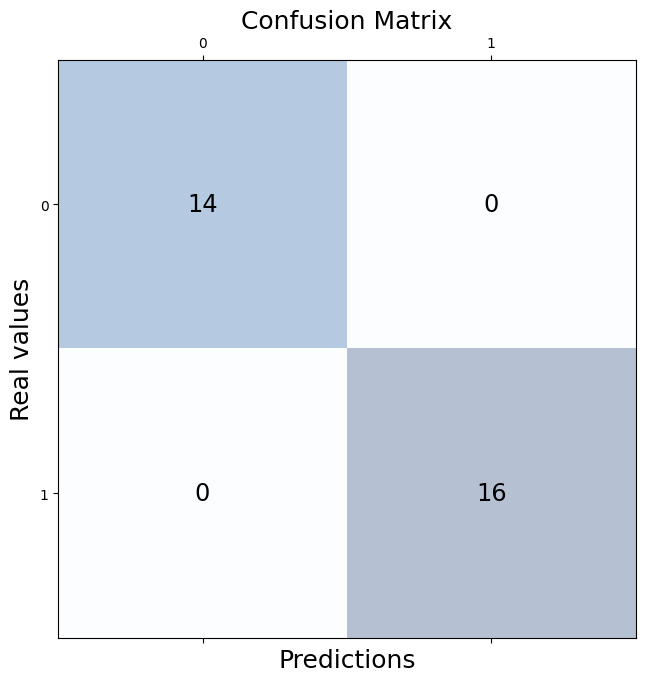

In [102]:
# +++ Test model +++
# apply model to test data
y_pred = model(X_test)
# generate integer data (0 or 1)
y_res = torch.round(y_pred)

# compare predicted result with real result: create confusion matrix
confArr2d = confusion_matrix(
    y_true=y_res.detach().numpy(), y_pred=y_test.detach().numpy()
)
#print("Confusion matrix: \n", confArr2d)

# show confusion matrix
fig, ax = plt.subplots(figsize=(7.5, 7.5))
pltConfMatrix(ax, confArr2d, cmap = plt.cm.Blues, alpha=0.3)


In [76]:
# plt.matshow?
confusion?
np.reshape(confArr2d, (2, 2))


array([[16,  0],
       [14,  0]])

Signature: confusion(prediction, truth)
Docstring:
Returns the confusion matrix for the values in the `prediction` and `truth`
tensors, i.e. the amount of positions where the values of `prediction`
and `truth` are
- 1 and 1 (True Positive)
- 1 and 0 (False Positive)
- 0 and 0 (True Negative)
- 0 and 1 (False Negative)
File:      /var/folders/63/3r98hjf137z17dq5ttq7swyc0000gn/T/ipykernel_48572/3112674214.py
Type:      function